**PROBLEM STATEMENT**


**Develop a machine learning model to predict house prices based on relevant features, optimizing for accuracy and generalization, to assist homebuyers and sellers in making informed decisions in the real estate market.**

**APPROACH**

**TO PERMIT OUR COLAB NOTEBOOK TO ACCESS THE FILES PRESENT IN THE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**IMPORTING ALL THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_excel('/content/housing+(1) (1).xlsx')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


**EDA (EXPLORATORY DATA ANALYSIS):**

Basic Exploratory Data Analysis (EDA) in machine learning involves the following key steps:

**Understanding the Data:**

Examine the dataset's structure, dimensions, and general information.
Check the data types of each feature (numeric, categorical, etc.).
Verify if there are any missing values in the dataset.

**Descriptive Statistics:**

Calculate basic summary statistics (mean, median, mode, standard deviation, etc.) for numerical features.
Explore the distribution of the target variable.

**Univariate Analysis:**

Analyze individual features in isolation to understand their characteristics.
Create histograms, box plots, or frequency distributions for numerical features.
Use bar plots for categorical features to visualize their distribution.

**Bivariate Analysis:**

Explore relationships between pairs of features.
Use scatter plots for numerical features to identify patterns or correlations.
Utilize correlation matrices to quantify the degree of correlation between variables.

**Handling Outliers:**

Identify and examine outliers in the dataset.
Decide whether to remove or transform outliers based on domain knowledge and the impact on the model.

**Handling Missing Data:**

Assess the extent of missing values in the dataset.
Decide on a strategy to handle missing data (imputation, removal, etc.).

**Feature Engineering:**

Create new features that might enhance the model's predictive power.
Convert categorical variables into numerical representations through encoding techniques.

**Data Visualization:**

Use visualizations such as heatmaps, pair plots, or correlation plots to gain insights into the relationships between multiple variables.
Addressing Data Imbalances (if applicable):

Check for class imbalances, especially in classification problems, and decide on strategies for handling them.

**Preparing Data for Modeling:**

Split the dataset into training and testing sets.
Normalize or standardize numerical features if needed.
A thorough EDA provides valuable insights into the characteristics of the data, helping in better feature selection, preprocessing, and ultimately improving the performance of machine learning models.



In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**DEALING WITH THE MISSING VALUES**

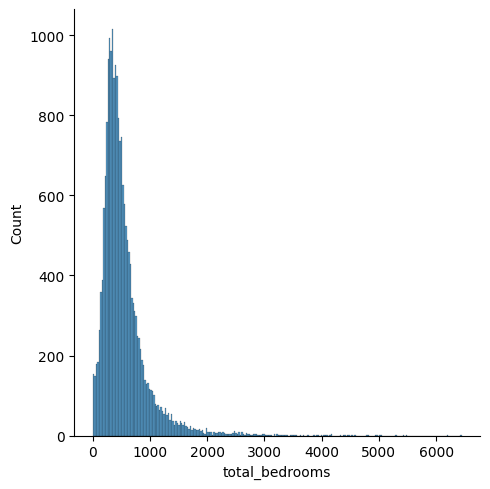

In [ ]:
sns.displot(df.total_bedrooms)

In [ ]:
fig=px.box(df,y=df['total_bedrooms'])
fig.show()

**FILLING THE MISSING DATA WITH MEDIAN BECAUSE THE DATA IS SKEWED**

In [ ]:
data_value=df.total_bedrooms.median()
df.total_bedrooms=df.total_bedrooms.fillna(data_value)
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**PERFORMING UNIVARIATE ANALYSIS:**

<Axes: xlabel='housing_median_age', ylabel='Count'>

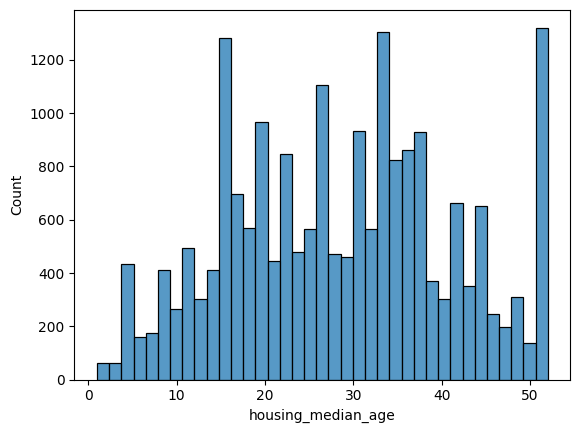

In [ ]:
sns.histplot(df['housing_median_age'])


**PERFORMING BIVARIATE ANALYSIS:**

In [ ]:
import plotly.express as px
fig=px.scatter(df,df['median_income'],df['median_house_value'])
fig.show()

In [ ]:
import plotly.express as px
fig=px.scatter(df,df['total_rooms'],df['median_house_value'])
fig.show()

**PERFORMING MULTIVARIATE ANALYSIS:**

<Axes: xlabel='latitude', ylabel='longitude'>

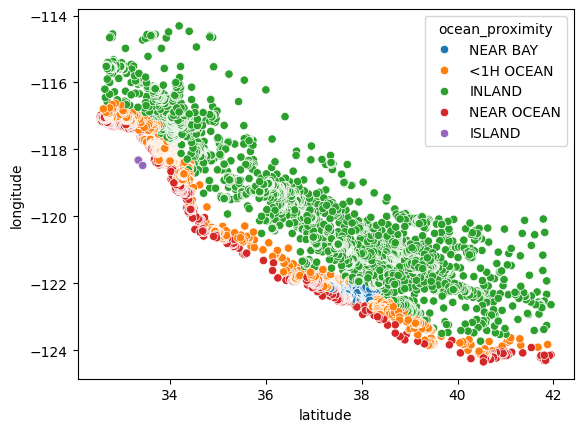

In [ ]:
sns.scatterplot(x=df.latitude,y=df.longitude,hue=df['ocean_proximity'])

**CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA:**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


**FEATURE SELECTION:**

**USING CORRELATION BETWEEN THE FEATURES:**


In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.014631
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014631,-0.070282,-0.018186,-0.014957,0.081750,1.000000


**DROPPING THE UNWANTED FEATURE:**

In [ ]:
df=df.drop('total_bedrooms',axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,741,349,1.8672,84700,1


**FEATURE SELECTION USING FORMULA API (P VALUES):**

In [ ]:
#from statsmodels import *
#from statsmodels.api import OLS
#model=OLS(df['median_house_value'],df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]).fit()
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          2.089e+04
Date:                Fri, 19 Jan 2024   Prob (F-statistic):                        0.00
Time:                        08:43:35   Log-Likelihood:                     -2.6083e+05
No. Observations:               20640   AIC:                                  5.217e+05
Df Residuals:                   20631   BIC:                                  5.218e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -2485.1323    108.112    -22.987      0.000   -2697.041   -2273.224
latitude           -9319.4494    343.655    -27.119      0.000   -9993.040   -8645.859
housing_median_age  1688.5541     45.011     37.514      0.000    1600.328    1776.780
total_rooms          -14.1934      0.817    -17.372      0.000     -15.795     -12.592
total_bedrooms        55.8550      6.393      8.737      0.000      43.324      68.386
population           -39.3866      1.153    -34.172      0.000     -41.646     -37.127
households           151.0729      7.076     21.350      0.000     137.203     164.943
median_income       4.515e+04    340.284    132.672      0.000    4.45e+04    4.58e+04
ocean_proximity     5980.4799    375.465     15.928      0.000    5244.539    6716.421
==============================================================================
Omnibus:                     4247.622   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13945.962
Skew:                           1.039   Prob(JB):                         0.00
Kurtosis:                       6.449   Cond. No.                     3.07e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**COLUMNS REMAINING AFTER FEATURE SELECTION:**

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

**SEPARATING THE DEPENDENT AND THE INDEPENDENT VARIABLES**

In [ ]:
from sklearn.model_selection import train_test_split
y=df['median_house_value']
x=df[['latitude','longitude','housing_median_age', 'total_rooms','population', 'households', 'median_income','ocean_proximity']]
x,y

(       latitude  longitude  housing_median_age  total_rooms  population  \
 0         37.88    -122.23                  41          880         322   
 1         37.86    -122.22                  21         7099        2401   
 2         37.85    -122.24                  52         1467         496   
 3         37.85    -122.25                  52         1274         558   
 4         37.85    -122.25                  52         1627         565   
 ...         ...        ...                 ...          ...         ...   
 20635     39.48    -121.09                  25         1665         845   
 20636     39.49    -121.21                  18          697         356   
 20637     39.43    -121.22                  17         2254        1007   
 20638     39.43    -121.32                  18         1860         741   
 20639     39.37    -121.24                  16         2785        1387   
 
        households  median_income  ocean_proximity  
 0             126         8.3252

**SPLITTING THE DATA INTO TRAINING AND TESTING:**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(df.shape)
print(x_train.shape)
print(x_test.shape)

(20640, 9)
(16512, 8)
(4128, 8)


In [ ]:
x_train.head

<bound method NDFrame.head of        latitude  longitude  housing_median_age  total_rooms  population  \
20340     34.23    -119.03                  21         3284        1832   
1247      39.10    -122.33                  10          266         154   
6694      34.14    -118.09                  40         3092        1457   
2990      35.32    -118.99                  35         1576         870   
14167     32.77    -117.05                  33         3535        1568   
...         ...        ...                 ...          ...         ...   
12529     38.57    -121.49                  51         1492         736   
11155     33.83    -117.97                  16         2035        1118   
16359     37.99    -121.31                  23         3135        1650   
1476      37.96    -122.04                  16         2913        1705   
11040     33.81    -117.81                  19         3154        1404   

       households  median_income  ocean_proximity  
20340         521

In [ ]:
x_test.head

<bound method NDFrame.head of        latitude  longitude  housing_median_age  total_rooms  population  \
5351      34.04    -118.40                  40         2079         720   
17914     37.36    -121.99                  32         1754         917   
16114     37.74    -122.50                  44         2792        1640   
1370      38.02    -122.16                  40         1800         761   
18495     37.01    -121.57                  44         1448        1066   
...         ...        ...                 ...          ...         ...   
9127      34.58    -118.08                  12         3851        2169   
6049      34.04    -117.74                  27         2215        1987   
15010     32.75    -117.03                  24         7879        3898   
3375      34.25    -118.28                  35         2045        1166   
8572      33.90    -118.41                  39         2311        1044   

       households  median_income  ocean_proximity  
5351          282

**PERFORMING FEATURE SCALING ON INDEPENDENT FEATURES:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Train=scaler.fit_transform(x_train)
X_Test=scaler.transform(x_test)
scaled_X_Train=pd.DataFrame(X_Train,columns=x_train.columns)
scaled_X_Test=pd.DataFrame(X_Test,columns=x_test.columns)
print(scaled_X_Train.head())
print(scaled_X_Test.head())

   latitude  longitude  housing_median_age  total_rooms  population  \
0 -0.652160   0.264577           -0.611710     0.298746    0.366969   
1  1.629583  -1.381409           -1.485254    -1.080662   -1.129213   
2 -0.694328   0.733434            0.897139     0.210991    0.032602   
3 -0.141462   0.284529            0.500074    -0.481913   -0.490794   
4 -1.336214   1.252169            0.341247     0.413469    0.131574   

   households  median_income  ocean_proximity  
0    0.059457       0.736548        -0.818925  
1   -1.174475      -0.852303        -0.115309  
2    0.098671       0.768248        -0.115309  
3   -0.565352      -1.163271        -0.115309  
4    0.454211      -0.558549         1.995537  
   latitude  longitude  housing_median_age  total_rooms  population  \
0 -0.741181   0.578811            0.897139    -0.252011   -0.624541   
1  0.814340  -1.211822            0.261834    -0.400556   -0.448887   
2  0.992382  -1.466202            1.214791     0.073873    0.195773   
3

**Till now the data has been preprocessed and made ready for the modeling purpose. The data passed through the process of feature engineering ( feature selection,scaling,converting categorical to numerical .....). Now that raw data has been converted into enriched / pure / cleaned data.**

**CREATING A MODEL (LINEAR REGRESSION MODEL):**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_X_Train,y_train)



LinearRegression()

**PREDICTING THE PRICE VALUES:**

In [ ]:
y_pred=lr.predict(scaled_X_Test)
y_pred

array([444852.62945518, 268885.63313686, 268925.21488725, ...,
       224837.73778101, 203127.16290152, 419137.95458629])

In [ ]:
y_predicted=pd.DataFrame(y_pred)
y_predicted

,0
0,444852.629455
1,268885.633137
2,268925.214887
3,273965.298390
4,177321.384088
...,...
4123,148144.020938
4124,131442.891351
4125,224837.737781
4126,203127.162902


**ACCURACY OF THE MODEL:**

**CALCULATING R2_SCORE (COEFFICIENT OF DETERMINATION) VALUE FOR THE MODEL:**

**If r2_ score value is near to 1 then we can say that the model is performing good.**

**If r2_score value is near to 0 then we can say that the model is performing bad.**  

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.617192102298934


In [ ]:
#from sklearn.metrics import r2_score
#print(r2_score(y_test,y_pred))

0.6411833291178228


**CONCLUSION:**

**In conclusion, a machine learning project involves several key stages, from data collection and preprocessing to model training, evaluation, and deployment.**

**The success of a machine learning project hinges on thoughtful consideration of each step.**

**In this way, linear regression model is used to predict the house price.**